In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


data = pd.read_csv("instagram_reach.csv")
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [3]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [4]:
#fill the null values
data['Caption'].fillna('No caption available', inplace=True)

In [5]:
# Remove unnecessary columns
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)

In [6]:
data.shape

(100, 6)

In [7]:
data["Time since posted"].unique()

array(['11 hours', '2 hours', '3 hours', '4 hours', '7 hours', '8 hours',
       '9 hours', '5 hours', '20 hours', '14 hours', '24 hours'],
      dtype=object)

In [8]:


data.rename(columns={'USERNAME':'Username'}, inplace=True)


In [9]:
# Convert Time since posted to hours
data['hours'] = data['Time since posted'].str.split().str[0]

#hours column is object datatype so convert it into int
data.hours = data.hours.astype(int)
#Drop the Time since posted column as it is not necessary
data = data.drop('Time since posted', axis=1)

In [10]:
data.head()

,Username,Caption,Followers,Hashtags,Likes,hours
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


## Exploratory Data Analysis¶

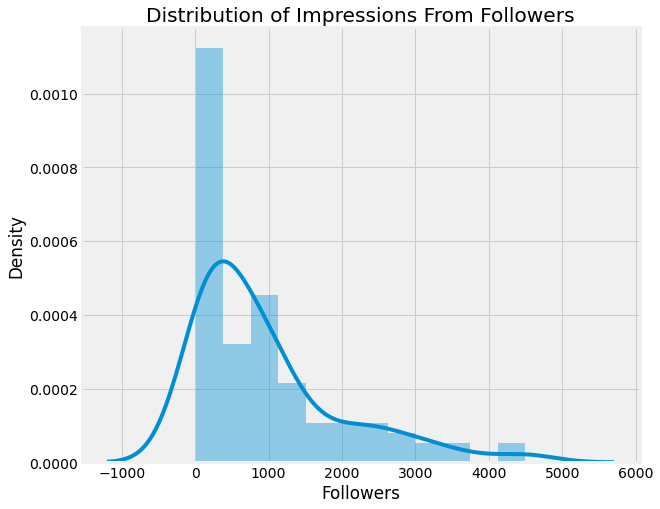

In [11]:

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

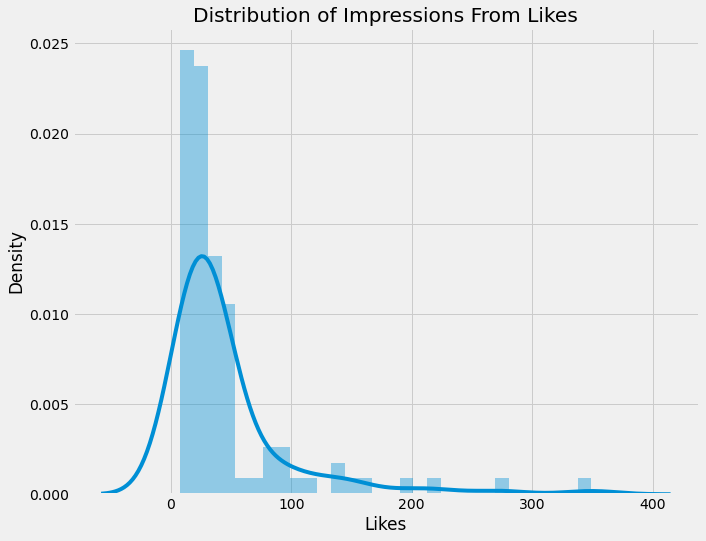

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

## Finding outliers

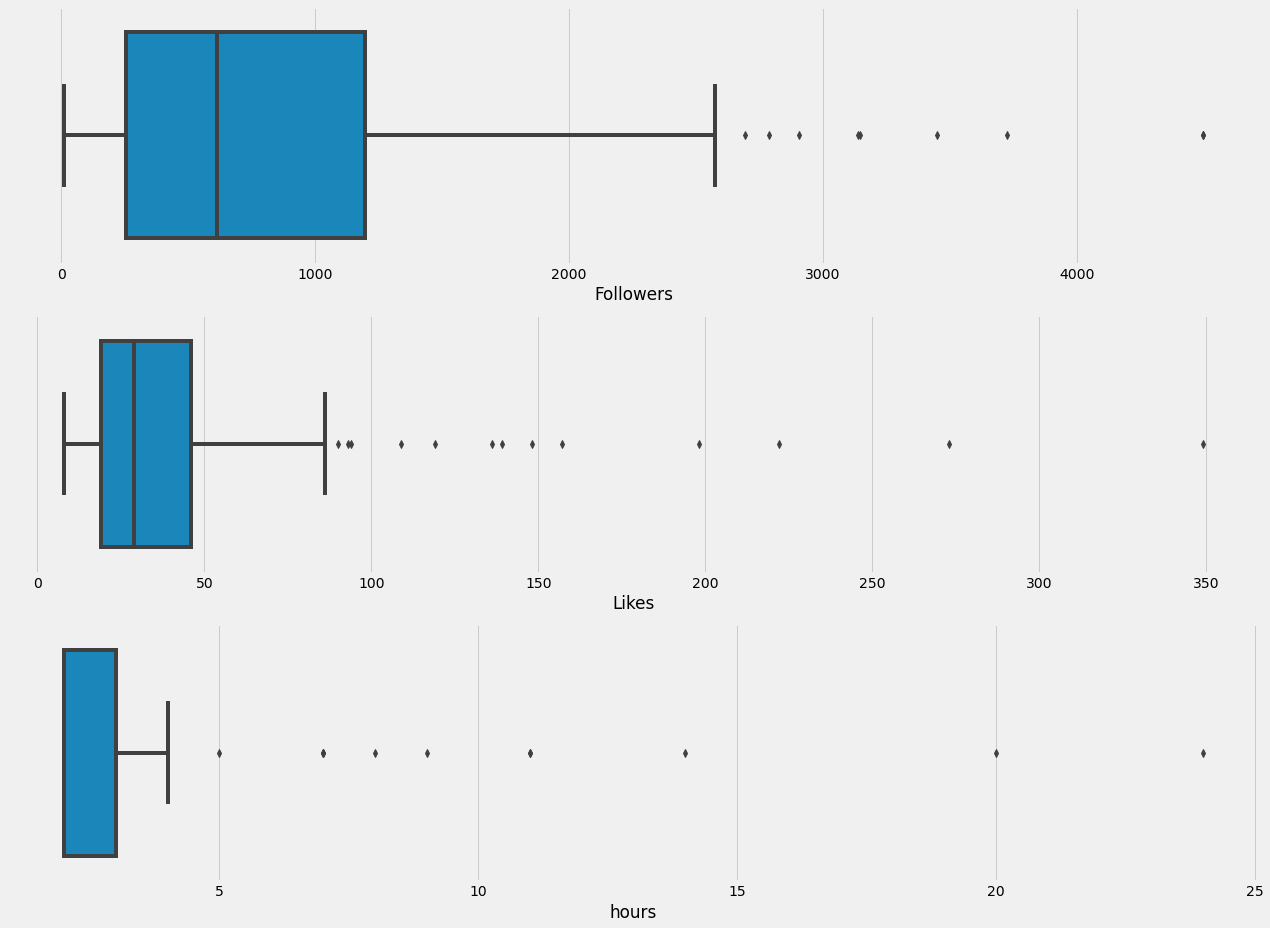

In [13]:
# Plot Boxplot of 'Followers', 'Likes', 'hours' column
numerical_col = ['Followers', 'Likes', 'hours']

fig = plt.figure(figsize=[20,15])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(3,1, i+1);
    ax1 = sns.boxplot(data = data, x=col)

## Handling Outliers

In [14]:
# Calculate IQR for numerical columns
numerical_col = ['Followers', 'Likes', 'hours']
Q1 = data[numerical_col].quantile(0.25)
Q3 = data[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Remove data points outside the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[~((data[numerical_col] < lower_bound) | (data[numerical_col] > upper_bound)).any(axis=1)]

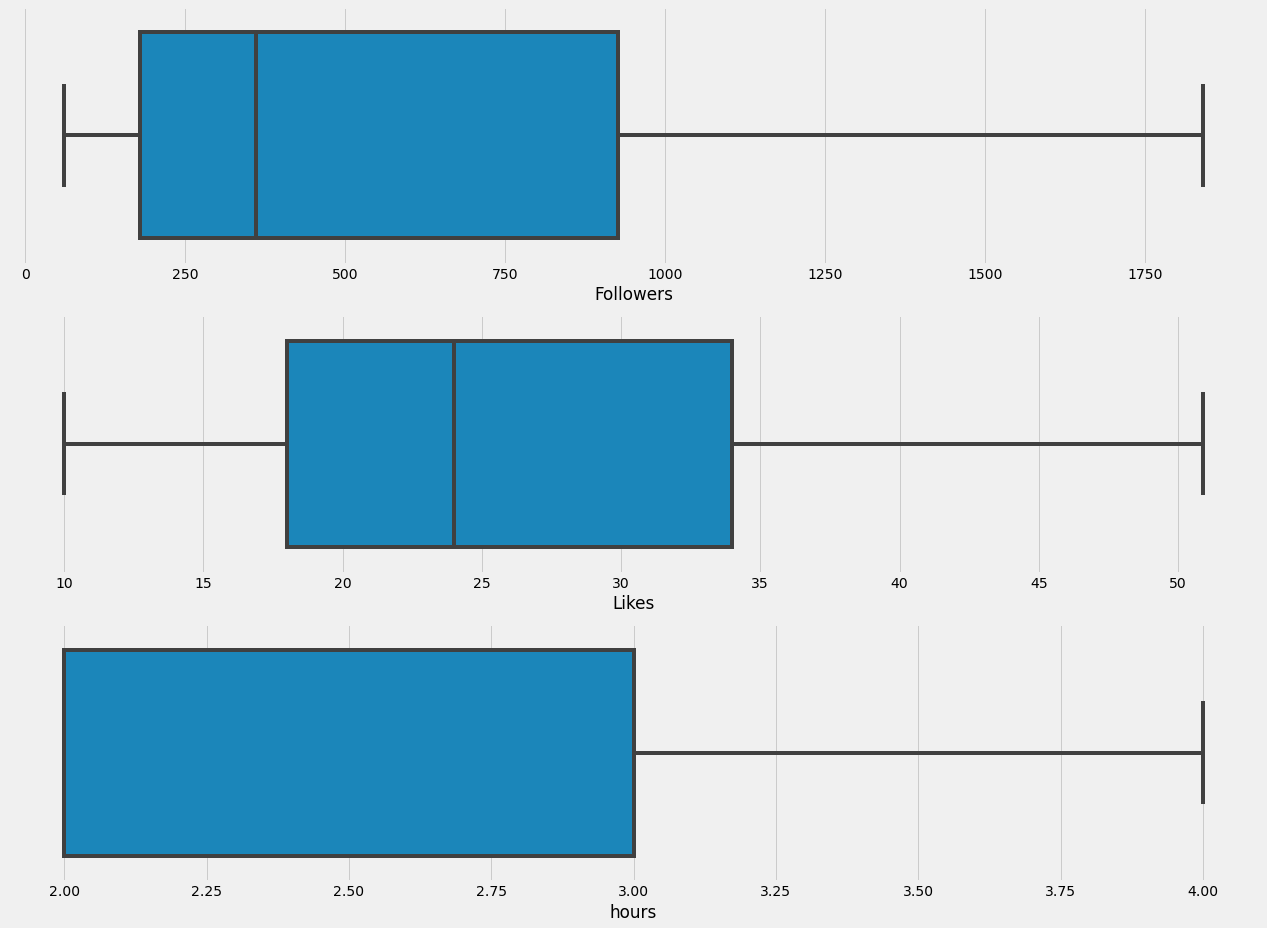

In [15]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = data[numerical_col].quantile(lower_percentile / 100)
upper_bound = data[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
data[numerical_col] = np.where(data[numerical_col] < lower_bound, lower_bound, data[numerical_col])
data[numerical_col] = np.where(data[numerical_col] > upper_bound, upper_bound, data[numerical_col])
# Plot Boxplot of 'Followers', 'Likes', 'hours' column
numerical_col = ['Followers', 'Likes', 'hours']

fig = plt.figure(figsize=[20,15])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(3,1, i+1);
    ax1 = sns.boxplot(data = data, x=col)

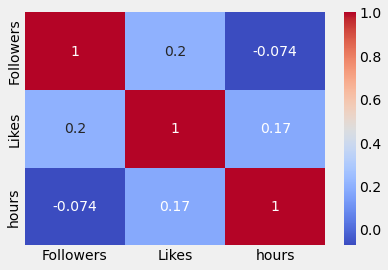

In [16]:
# Correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Converting Categorical data to numerical by replacing their length and counts
data['Caption'] = data['Caption'].apply(lambda x: len(str(x)))
data['Hashtags'] = data['Hashtags'].apply(lambda x: len(str(x).split()))

 


## Model building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
data.columns

Index(['Username', 'Caption', 'Followers', 'Hashtags', 'Likes', 'hours'], dtype='object')

In [26]:
data.head()

,Username,Caption,Followers,Hashtags,Likes,hours
1,drgorillapaints,1,880.0,1,23.0,2.0
2,aitrading_official,1,255.0,1,25.0,2.0
3,opensourcedworkplace,1,340.0,1,49.0,3.0
4,crea.vision,1,304.0,1,30.0,3.0
5,be.masterly,1,1231.0,1,18.0,3.0


In [27]:
 # Include all the input features you mentioned
X= data[['Caption', 'Followers', 'Hashtags']]  # Include all the input features you mentioned
y = data[['Likes', 'hours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

In [29]:
# Select a model
lin_model = LinearRegression()

# lin_hours = LinearRegression()
# Train the model

lin_model.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Test predicted data')

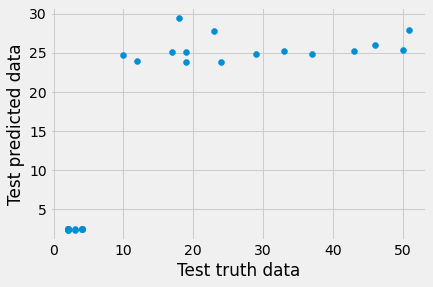

In [30]:
# Make predictions
pred = lin_model.predict(X_test)
# visualize the relationship between the truth point and predicted point

plt.scatter(y_test, pred)       
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

<AxesSubplot:ylabel='Density'>

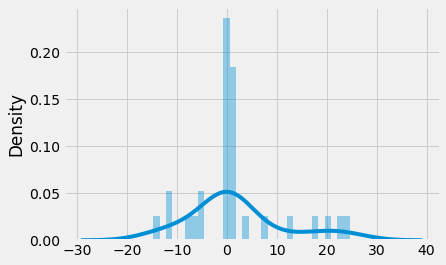

In [31]:
#Residuals
residuals = y_test - pred
sns.distplot(residuals)

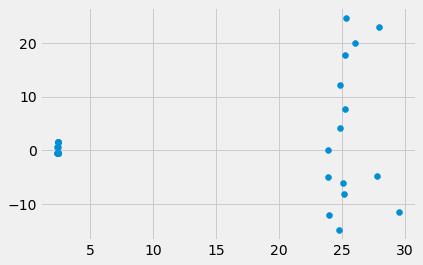

In [32]:
# scattter plot with predictions and residuals
#Check for Homoscedasticity
plt.scatter(pred, residuals)

In [33]:
# Evaluating the model performance
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)
print(' MSE: {},\n MAE: {},\n R^2: {},\n adj_r2: {}'.format(mse, mae, r2, adj_r2))

 MSE: 91.20768456971852,
 MAE: 6.139774860077128,
 R^2: -0.1029354177940599,
 adj_r2: -0.40373598628334895


***The MSE of 91.21 suggests significant deviations between predicted and actual values.***

***With an MAE of 6.14, the model's average prediction error is relatively high.***

***The R^2 value of -0.10 implies that the model explains very little variance in the data.***

***The negative adj_r2 value of -0.40 further indicates a poor fit of the model to the data.
Overall, these metrics show that the model's predictions are inaccurate and unreliable*** 

***current algorithm is not performing well. In such a scenario, it is worth considering alternative algorithms that may yield better results. such as:-Random Forest.,Gradient Boosting***

## Gradient Boosting (XGBoost):

In [35]:
!pip install xgboost


  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [39]:
import xgboost as xgb

# Create a Gradient Boosting Regressor
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)



Mean Squared Error (MSE): 238.3860247687865
Mean Absolute Error (MAE): 10.038645089467366
R-squared (R^2): -1.0651389924653465


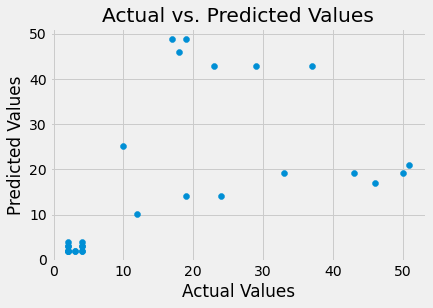

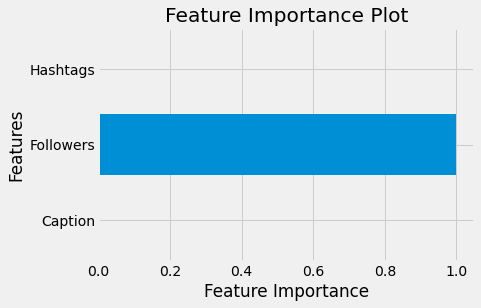

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [41]:
# Evaluate Model Performance
from sklearn.model_selection import GridSearchCV

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize Predictions
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Feature Importance Analysis
importance = xgb_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

# Hyperparameter Tuning (Example)
param_grid = {
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Model Persistence
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Load the saved model
loaded_model = joblib.load('xgb_model.pkl')

# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(X_test)


***Overall, these metrics suggest that the XGBoost model's performance is poor. It is not able to accurately estimate the target variable and lacks a strong relationship with the input features.***

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)

rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [43]:
predictions=rf.predict(X_test)
# Evaluating the model performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)
print(' MSE: {},\n MAE: {},\n R^2: {},\n adj_r2: {}'.format(mse, mae, r2, adj_r2))

 MSE: 91.58790064111108,
 MAE: 6.194308888888888,
 R^2: -0.11109465954155484,
 adj_r2: -0.4141204757801604


***Recommendations: Based on the analysis, there are several potential areas for improvement or further exploration:***

***Feature Engineering: Consider exploring additional features or transforming existing features to improve model performance. For example, extracting more meaningful information from the caption or engineering new features related to engagement rates or posting frequency.***

***Model Selection: Besides linear regression, consider experimenting with other machine learning algorithms that may better capture the underlying patterns and relationships in the data. Algorithms such as decision trees, random forests, or gradient boosting may be worth exploring.***

***Data Collection: Collecting more data, if feasible, may help improve the models' predictive power. Increasing the sample size can lead to better generalization and model performance.***

***Limitations: It's important to acknowledge the limitations of the analysis. These may include potential biases in the data, assumptions made during preprocessing, or limitations of the linear regression model itself. It's crucial to consider these limitations when interpreting the results and making decisions based on the model's predictions.***

***Overall, the models provide a starting point for predicting the number of likes and time since posted based on the available Instagram features. However, further refinement, experimentation, and consideration of additional factors are recommended to enhance the accuracy and usefulness of the models.***